### Sales_Price_Prediction_Simple_Linear_Regression

#### Introduction:-

A retail company wants to predict the sales price of their products based on a specific feature that they believe strongly influences the price. They have collected historical data on various products, including the feature of interest and the corresponding sales prices. The company aims to build a simple linear regression model that can accurately predict the sales price of new products based on this feature.

#### Problem_Statement:-

The objective of this project is to develop a simple linear regression model that can effectively predict the sales price of products based on the chosen feature. The model will be trained using historical data, and the company intends to use it to make price predictions for new products.

#### Importing  libraries:-

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

#### Importing the Data:-

In [2]:
data = pd.read_csv("Sales_data.csv")
data

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9
...,...,...,...,...
195,38.2,3.7,13.8,7.6
196,94.2,4.9,8.1,14.0
197,177.0,9.3,6.4,14.8
198,283.6,42.0,66.2,25.5


In [3]:
# See top 5 records
data.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9


In [4]:
# See random 5 records
data.sample(5)

,TV,Radio,Newspaper,Sales
126,7.8,38.9,50.6,6.6
99,135.2,41.7,45.9,17.2
4,180.8,10.8,58.4,17.9
44,25.1,25.7,43.3,8.5
149,44.7,25.8,20.6,10.1


In [5]:
# See shape of data
data.shape

(200, 4)

There are 200 rows and 4 columns in our data

In [6]:
# See is there any duplicate row is there
data.duplicated().sum()

0

In [7]:
# See is there any null value is there or not
data.isnull().sum()

TV           0
Radio        0
Newspaper    0
Sales        0
dtype: int64

In [8]:
# See data type of variable
data.dtypes

TV           float64
Radio        float64
Newspaper    float64
Sales        float64
dtype: object

In [9]:
# see information of variables
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   Radio      200 non-null    float64
 2   Newspaper  200 non-null    float64
 3   Sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


In [10]:
# See statestical analysis of variable
data.describe()

,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,15.130500
std,85.854236,14.846809,21.778621,5.283892
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,11.000000
50%,149.750000,22.900000,25.750000,16.000000
75%,218.825000,36.525000,45.100000,19.050000
max,296.400000,49.600000,114.000000,27.000000


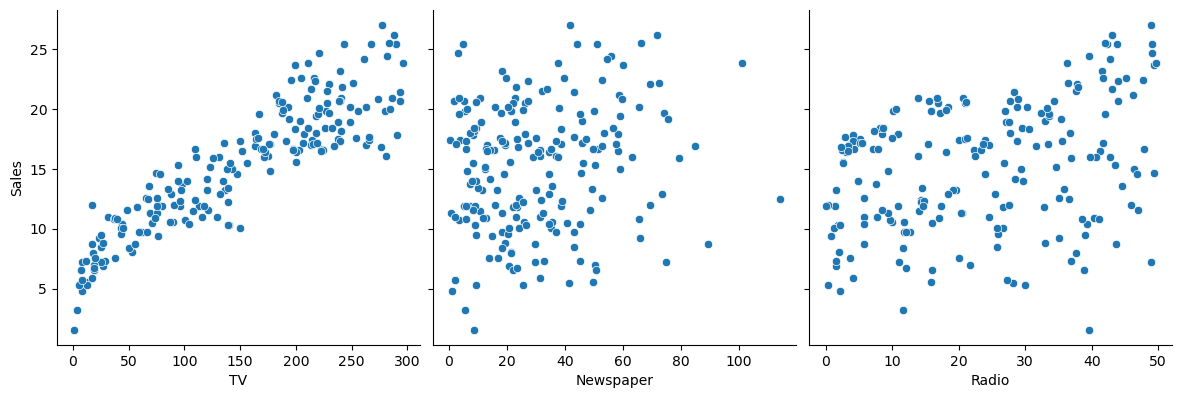

In [11]:
# See Correlation using Scatterplot
sns.pairplot(data, x_vars=['TV', 'Newspaper', 'Radio'], y_vars='Sales', height=4, aspect=1, kind='scatter')
plt.show()

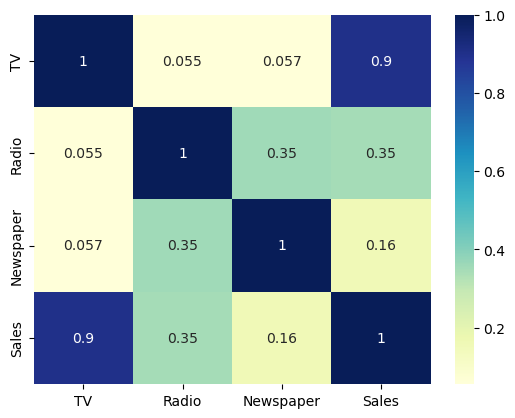

In [12]:
# Let's see the correlation between different variables.
sns.heatmap(data.corr(), cmap="YlGnBu", annot = True)
plt.show()

As is visible from the pairplot and the heatmap, the variable TV seems to be most correlated with Sales. So let's go ahead and perform simple linear regression using TV as our feature variable.

Therefore we can drop Newspaper and Radio column.

In [13]:
import pandas as pd
if "Newspaper" in data.columns and "Radio" in data.columns:
    data.drop(["Newspaper", "Radio"], axis=1, inplace=True)

In [14]:
data

,TV,Sales
0,230.1,22.1
1,44.5,10.4
2,17.2,12.0
3,151.5,16.5
4,180.8,17.9
...,...,...
195,38.2,7.6
196,94.2,14.0
197,177.0,14.8
198,283.6,25.5


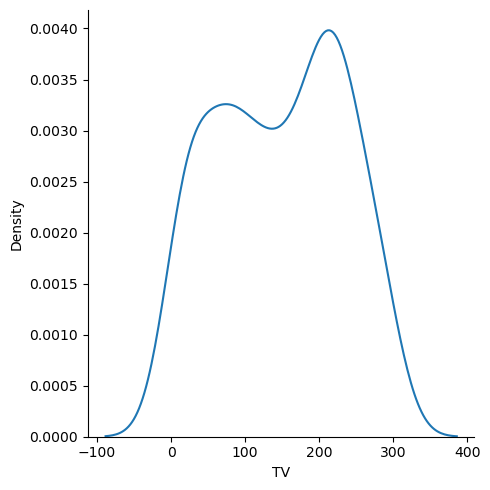

In [15]:
sns.displot(data.TV, kind = 'kde')

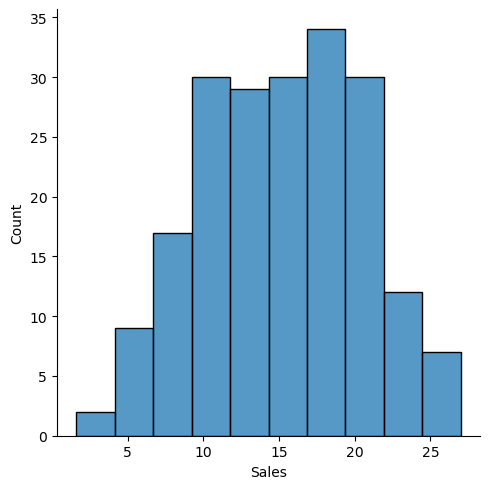

In [16]:
sns.displot(data.Sales, kind = 'hist')

In [17]:
# See skewness 
data.TV.skew() 

-0.06985336213274573

In [18]:
data.Sales.skew()

-0.07373923537186912

<AxesSubplot:xlabel='TV'>

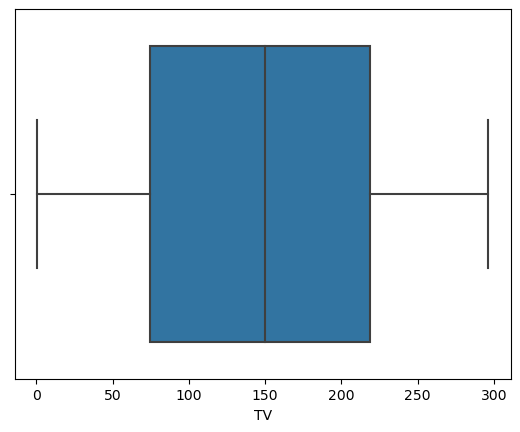

In [19]:
# Outlier detection 
sns.boxplot(data.TV)    

From above boxplot we can see that there is no any outlier in our data

#### Separating Dependent variable from dataframe

In [20]:
x=data['TV']
x

0      230.1
1       44.5
2       17.2
3      151.5
4      180.8
       ...  
195     38.2
196     94.2
197    177.0
198    283.6
199    232.1
Name: TV, Length: 200, dtype: float64

In [21]:
y=data['Sales']
y

0      22.1
1      10.4
2      12.0
3      16.5
4      17.9
       ... 
195     7.6
196    14.0
197    14.8
198    25.5
199    18.4
Name: Sales, Length: 200, dtype: float64

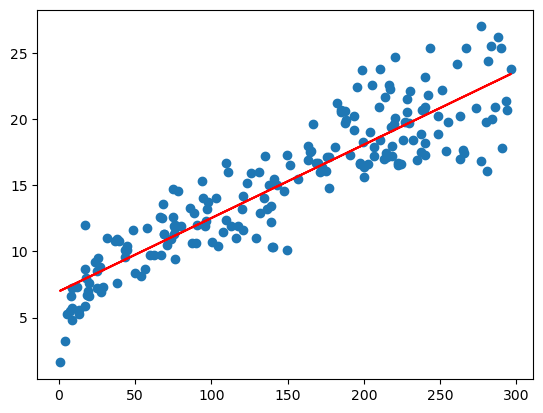

In [22]:
# To plot a linear Regression(Best Fit) line on a scatter plot, using np.polyfit()
import numpy as np
plt.scatter(x,y)
m,b = np.polyfit(x,y,1)     
plt.plot(x,m*x + b, 'r')

#### Spliting data into training and testing

In [23]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(x,y,test_size=0.33,random_state=100)

In [24]:
# Create new axis for x column
X_train = X_train[:,np.newaxis]
X_test = X_test[:,np.newaxis]

#### Performing Linear Regression

In [25]:
from sklearn.linear_model import LinearRegression

In [26]:
# Fitting of model
lr=LinearRegression()
lr.fit(X_train,Y_train)

LinearRegression()

In [27]:
# Predicting the Salary for the Test values
Y_pred=lr.predict(X_test)

#### Performance Metrics

In [28]:
from sklearn.metrics import r2_score,mean_squared_error,mean_absolute_error

In [29]:
print('MSE: ', mean_squared_error(Y_test,Y_pred))
print('MAE: ', mean_absolute_error(Y_test,Y_pred))
print('R-Square:', r2_score(Y_test, Y_pred))

MSE:  4.1254217196187275
MAE:  1.6331542679158708
R-Square: 0.7815280107488248


In [30]:
lr.score(X_train, Y_train)

0.8183563614936119

In [31]:
lr.score(X_test, Y_test)

0.7815280107488248

In [32]:
# Intecept and coeff of the line
print('Intercept of the model:',lr.intercept_)
print('Coefficient of the line:',lr.coef_)

Intercept of the model: 6.928500660928629
Coefficient of the line: [0.05444333]


In [33]:
df1 = pd.DataFrame({'Actual': Y_test, 'Predicted': Y_pred})
df1

,Actual,Predicted
126,6.6,7.353159
104,20.7,19.896901
99,17.2,14.289238
92,19.4,18.780813
111,21.8,20.087453
...,...,...
3,16.5,15.176665
185,22.6,18.089383
26,15.0,14.708452
90,14.0,14.240239


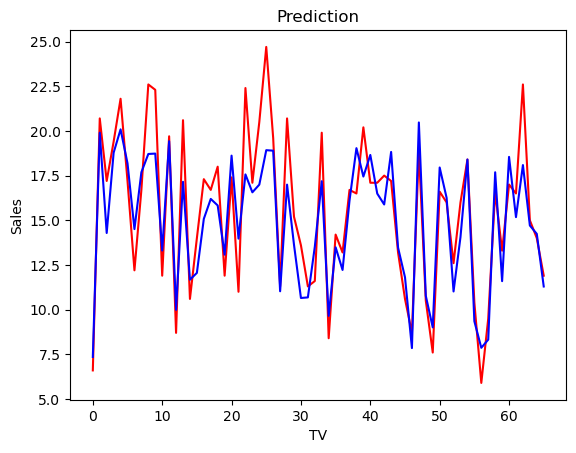

In [34]:
# Plotting the actual and predicted values    
c = [i for i in range (len(Y_test))]
plt.plot(c,Y_test,color='r',linestyle='-')
plt.plot(c,Y_pred,color='b',linestyle='-')
plt.xlabel('TV')
plt.ylabel('Sales')
plt.title('Prediction')
plt.show()

#### 2.Ridge Regression Model

In [35]:
from sklearn.linear_model import Ridge

In [36]:
ridge = Ridge()
ridge.fit(X_train, Y_train)

Ridge()

In [37]:
# Coefficient 
print(ridge.coef_)

[0.05444328]


In [38]:
# Print the intercept
print(ridge.intercept_)

6.9285074254537715


In [39]:
ridge_pred = ridge.predict(X_test)

In [40]:
ridge_pred

array([ 7.35316501, 19.89689679, 14.28923892, 18.78080954, 20.08744827,
       18.18737779, 14.50701204, 17.68649961, 18.71003328, 18.73181059,
       13.30925987, 19.42324025,  9.98821978, 17.15295546, 11.67596147,
       12.05706443, 15.07866648, 16.19475373, 15.82998375, 13.07515377,
       18.6174797 , 13.97346789, 17.56672439, 16.56496803, 16.99506995,
       18.92236207, 18.89514043, 11.02808643, 16.99506995, 13.63047523,
       10.6524278 , 10.68509376, 13.51614434, 17.18562143,  9.65067144,
       13.4889227 , 12.22039427, 16.09675582, 19.03669296, 17.44694917,
       18.65559   , 16.49419177, 15.88442703, 18.82436417, 13.47258971,
       11.81206967,  7.84859886, 20.47399556, 10.77220301,  9.00824073,
       17.95327168, 16.25464134, 11.01719777, 14.06602147, 18.39970658,
        9.3512334 ,  7.86493185,  8.3222554 , 17.68649961, 11.59429655,
       18.54670344, 15.17666439, 18.08937988, 14.70845218, 14.24023997,
       11.2948585 ])

#### Performance Metrics for ridge regression

In [41]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

print('MSE:',mean_squared_error( Y_test,ridge_pred))
print('MAE:', mean_absolute_error( Y_test,ridge_pred))
print("RMSE:", np.sqrt(mean_squared_error( Y_test,ridge_pred)))

MSE: 4.125423783342005
MAE: 1.6331545407059391
RMSE: 2.031113926726417


In [42]:
# R square

from sklearn.metrics import r2_score
score = r2_score(Y_test, ridge_pred)
print(score)

0.781527901459215


#### 3. Lasso regression model

In [43]:
from sklearn.linear_model import Lasso

In [44]:
lasso = Lasso()
lasso.fit(X_train, Y_train)

Lasso()

In [45]:
# Prediction for data set
lasso_pred = lasso.predict(X_test)

In [46]:
lasso_pred

array([ 7.36892697, 19.88664571, 14.29061693, 18.772873  , 20.07680203,
       18.18067189, 14.50793844, 17.68083243, 18.70224351, 18.72397566,
       13.31267016, 19.41397144,  9.99851719, 17.14839474, 11.68275886,
       12.0630715 , 15.07840739, 16.19218011, 15.82816659, 13.07904954,
       18.60988187, 13.97550075, 17.5613056 , 16.56162667, 16.99083665,
       18.91413197, 18.88696679, 11.03622738, 16.99083665, 13.63321938,
       10.66134778, 10.69394601, 13.51912559, 17.18099296,  9.66166886,
       13.4919604 , 12.22606263, 16.09438543, 19.02822577, 17.44177877,
       18.64791313, 16.49099718, 15.88249697, 18.8163373 , 13.47566129,
       11.8185848 ,  7.86333339, 20.4625477 , 10.78087461,  9.02057041,
       17.94705127, 16.25194353, 11.02536131, 14.06786239, 18.39256036,
        9.36285179,  7.87963251,  8.33600767, 17.68083243, 11.6012633 ,
       18.53925238, 15.17620207, 18.08287721, 14.70896083, 14.2417196 ,
       11.30244623])

#### Performance metrics of Lasso

In [47]:
print('MSE:',mean_squared_error( Y_test,lasso_pred))
print('MAE:', mean_absolute_error( Y_test,lasso_pred))
print("RMSE:", np.sqrt(mean_squared_error( Y_test,lasso_pred)))

MSE: 4.130555307783671
MAE: 1.63382567986779
RMSE: 2.03237676324634


In [48]:
score = r2_score(Y_test, lasso_pred)
print(score)

0.7812561487927349


In [49]:
lasso.score(X_train, Y_train)

0.818352839220139

#### 4. Elastic net Regression Model

In [50]:
from sklearn.linear_model import ElasticNet

In [51]:
elastic = ElasticNet()
elastic.fit(X_train,Y_train)

ElasticNet()

In [52]:
# Printing coefficient
print(elastic.coef_)

[0.05438378]


In [53]:
#Printing intercept
print(elastic.intercept_)

6.937278074266732


In [54]:
# Prediction for data set
elastic_pred = elastic.predict(X_test)

In [55]:
elastic_pred

array([ 7.36147156, 19.89149447, 14.28996513, 18.77662698, 20.0818377 ,
       18.18384378, 14.50750025, 17.68351301, 18.70592807, 18.72768158,
       13.31105709, 19.41835559,  9.99364651, 17.15055196, 11.67954369,
       12.06023015, 15.07852994, 16.19339743, 15.82902611, 13.07720684,
       18.61347564, 13.97453921, 17.56386869, 16.56320714, 16.992839  ,
       18.91802481, 18.89083292, 11.03237671, 16.992839  , 13.63192139,
       10.65712863, 10.6897589 , 13.51771546, 17.18318223,  9.65646708,
       13.49052357, 12.22338149, 16.09550663, 19.03223075, 17.44422437,
       18.65154429, 16.49250822, 15.88340989, 18.82013401, 13.47420843,
       11.81550314,  7.85636396, 20.46796254, 10.77677294,  9.01473847,
       17.94999353, 16.25321959, 11.02149995, 14.06699163, 18.39594052,
        9.35735629,  7.87267909,  8.32950284, 17.68351301, 11.59796802,
       18.54277673, 15.17642075, 18.08595298, 14.70872024, 14.24101973,
       11.29885723])

#### Performance metrics for Elastic net

In [56]:
print('MSE:',mean_squared_error( Y_test,elastic_pred))
print('MAE:', mean_absolute_error( Y_test,elastic_pred))
print("RMSE:", np.sqrt(mean_squared_error( Y_test,elastic_pred)))

MSE: 4.128114591924007
MAE: 1.6335082308517779
RMSE: 2.031776216005101


In [57]:
# R square
from sklearn.metrics import r2_score
score = r2_score(Y_test, elastic_pred)
print(score)

0.7813854029842571


In [58]:
elastic.score(X_train,Y_train)

0.8183553825436057